In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import csv
import os
from vzorci_in_pomozne_definicije import *

Opomba: JSON ohranja tipe spremenljivk!! Morda bom popravil analizo tako, da ne delam s csv-jem ampak JSON-om.

In [2]:
podatkovna_baza = pd.read_json(FILENAME_POPOLNI_PODATKI_KARTE_JSON)

<AxesSubplot: >

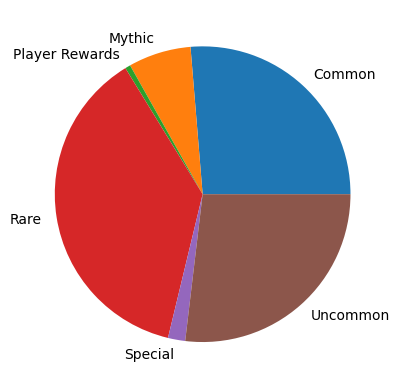

In [3]:
delezi_redkosti = podatkovna_baza.groupby("redkost").size()
delezi_redkosti.plot(kind="pie")

<AxesSubplot: >

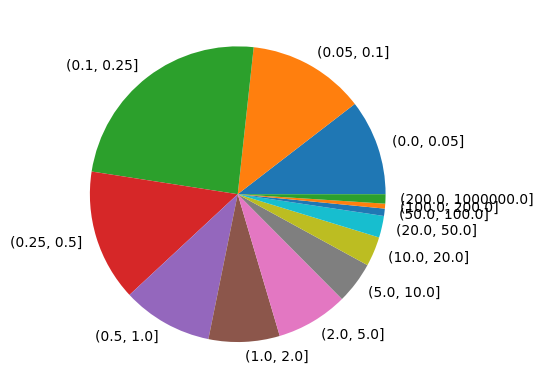

In [4]:
cenovni_razredi_kart = np.array([0, 0.05, 0.10, 0.25, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 1000000])
podatki_po_ceni_eu = podatkovna_baza.groupby(pd.cut(podatkovna_baza["povprecje_eu"], cenovni_razredi_kart)).size()
podatki_po_ceni_us = podatkovna_baza.groupby(pd.cut(podatkovna_baza["povprecna_cena"], cenovni_razredi_kart)).size()
#pd.merge(podatki_po_ceni_eu, podatki_po_ceni_us).plot(kind = "bar")
podatki_po_ceni_eu.plot(kind = "pie")

# Tukaj je treba porihtati, da dobimo primerjavo ameriških cenovnih razredov z evropskimi

<AxesSubplot: xlabel='redkost'>

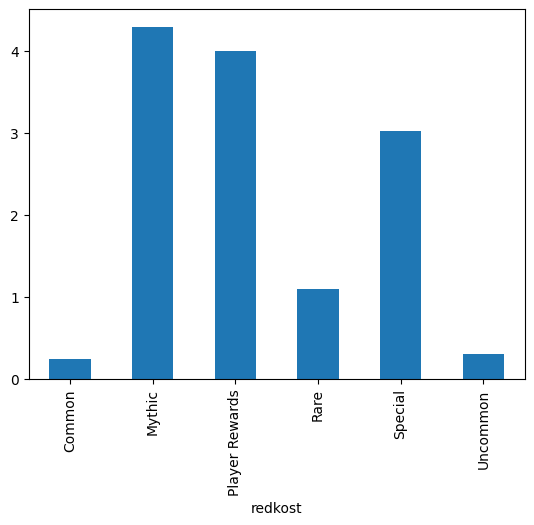

In [5]:
povprecna_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].mean()
mediana_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].median()   
modus_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].value_counts()
#povprecna_cena_glede_na_redkost.plot(kind="bar") #.plot(kind="bar")

mediana_cena_glede_na_redkost.plot(kind="bar")

"Youll"
Artifact
Card
Conspiracy
Creature
Dungeon
Eaturecray
Elemental
Emblem
Enchantment
Ever
Host
Instant
Interrupt
Land
Phenomenon
Plane
Planeswalker
Scariest
Scheme
See
Sorcery
Sticker
Token
Tribal
Types:
Vanguard
instant
cardtype
Artifact         4884
Creature        20514
Enchantment      4697
Instant          5130
Land             2956
Planeswalker      605
Sorcery          5098
dtype: int64


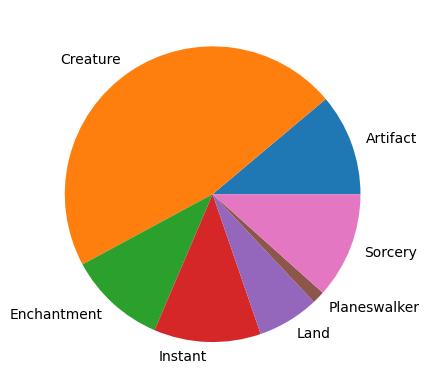

In [101]:
povezovalna_cardtype = pd.read_csv(os.path.join("Podatki", "Povezovalne_tabele", f"povezovalna_cardtype.csv"))
grupa_po_cardtypu = povezovalna_cardtype.groupby("cardtype")
velikost_grupe_po_cardtypu = grupa_po_cardtypu.size()
velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100].plot.pie()
dovolj_veliki_kljuci_cardtypov = velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100].keys()

for i in velikost_grupe_po_cardtypu.keys():
    print(i)
print(velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100])
#povprecna_cena_glede_na_cardtype = podatkovna_baza.groupby("cardtype")["povprecna_cena"].median()


<AxesSubplot: >

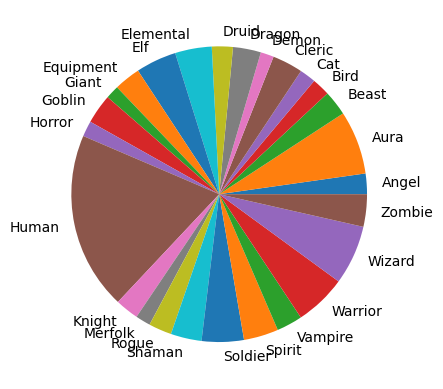

In [56]:
povezovalna_subtype = pd.read_csv(os.path.join("Podatki", "Povezovalne_tabele", "povezovalna_subtype.csv"))
grupa_po_subtypu = povezovalna_subtype.groupby("subtype")
velikost_grupe_po_subtypu = grupa_po_subtypu.size()
velikost_grupe_po_subtypu[velikost_grupe_po_subtypu > 300].plot.pie()
#povprecna_cena_glede_na_cardtype = podaytkovna_baza.groupby("cardtype")["povprecna_cena"].median()

<AxesSubplot: xlabel='cardtype'>

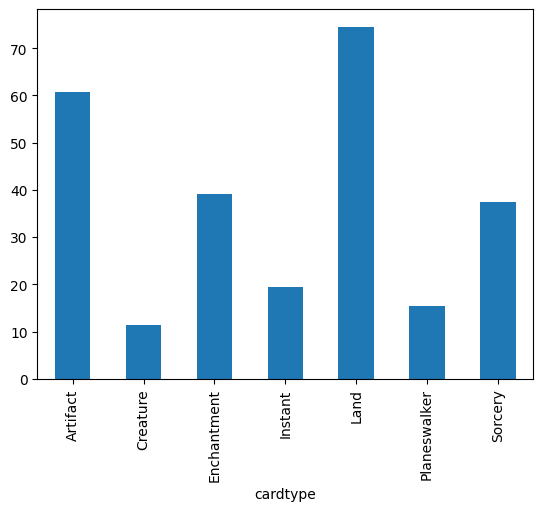

In [107]:
povprecna_cena_cardtypov = podatkovna_baza[["id_karte", "povprecna_cena"]].merge(povezovalna_cardtype)
#print(povprecna_cena_cardtypov)
povprecna_cena_cardtypov.groupby("cardtype")["povprecna_cena"].mean()[dovolj_veliki_kljuci_cardtypov].plot.bar()
povprecna_cena_cardtypov.groupby("cardtype")["povprecna_cena"].median()[dovolj_veliki_kljuci_cardtypov].plot.bar()